In [1]:
import numpy as np
import helpers
from sklearn import cluster

def quantize(raster, n_colors):
    width, height, depth = raster.shape
    reshaped_raster = np.reshape(raster, (width * height, depth))

    model = cluster.KMeans(n_clusters=n_colors)
    labels = model.fit_predict(reshaped_raster)
    palette = model.cluster_centers_

    quantized_raster = np.reshape(palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

c:\users\thijs\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\thijs\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


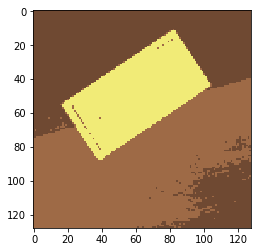

In [134]:
%%time
%matplotlib inline

image = Image.open(r"D:\LEGO Vision Datasets\classification-color-indepent\3020-red\33.png").convert("RGB").resize((128,128))

kmeans = quantize(np.asarray(image), 3)
count_rgb = np.unique(kmeans, return_counts=True, axis=None)

rgbs = defaultdict(list)

for i, count in enumerate(count_rgb[-1]):
    rgbs[count].append(count_rgb[0][i])
dominant_color = rgbs[min(rgbs.keys())]
np.flip(np.asarray(dominant_color), axis=0) * 256

Wall time: 85 ms


In [135]:
%%time
%matplotlib inline
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from skimage.transform import resize


image = Image.open(r"D:\LEGO Vision Datasets\classification-color-indepent\3020-red\33.png").convert("RGB").resize((128,128))
counter = Counter()
kmeans = quantize(np.asarray(image), 3)
onedar = []
for row in kmeans:
    for rgb in row:
        counter[tuple(rgb)] += 1
        
print(counter.most_common()[-1][0])
# count_rgb = np.unique(kmeans, return_counts=True, axis=None)

# print(count_rgb)
# for i, count in enumerate(count_rgb[-1]):
#     rgbs[count].append(count_rgb[0][i])
# dominant_color = rgbs[min(rgbs.keys())]
# print(np.flip(np.asarray(dominant_color), axis=0))

(242.51737328657953, 236.95632770162575, 120.64583997449793)
Wall time: 128 ms


In [69]:
%%time
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 3

print('reading image')
im = Image.open(r"D:\LEGO Vision Datasets\classification-color-indepent\3020-red\33.png").convert("RGB")
im = im.resize((128, 128))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)

print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)
print(im.getcolors())
vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences
print(counts, bins)

reading image
finding clusters
cluster centres:
 [[157.93786518 106.78224312  70.4671512 ]
 [110.92615187  73.15652593  49.92005137]
 [242.50159337 236.93945188 120.63129382]]
None
[6955 6292 3137] [0.         0.66666667 1.33333333 2.        ]
Wall time: 65.5 ms


c:\users\thijs\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Counter({(0.5009977182115944, 0.5032487865795773, 0.4750583054658175): 2468, (0.44021025618785775, 0.4506750661205307, 0.42550136252719967): 1541, (0.21458574437649774, 0.6903476174573898, 0.8326632562998999): 87})


'#37b0d4'

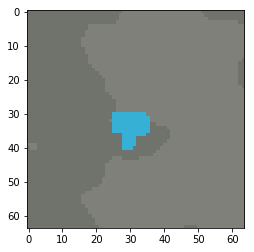

In [10]:
import helpers, webcolors
import numpy as np
from PIL import Image
from collections import Counter
from colour import Color

im = np.asarray(Image.open(r"C:\Users\Thijs\Google Drive\LEGO Vision\Natuurlijke data\2458-blue\IMG_20181019_105342.jpg").convert("RGB"))
im = helpers.pipeline(im, smoothing=0.2, denoising=0.2, shape=(64,64), flatten=False)

counter = Counter()
kmeans = helpers.quantize(np.asarray(im), 3)
plt.imshow(kmeans)
onedar = []
for row in kmeans:
    for rgb in row:
        counter[tuple(rgb)] += 1
print(counter)
rgb = helpers.dominant_color(im)
Color(rgb=(0.21458574437649774, 0.6903476174573898, 0.8326632562998999)).hex

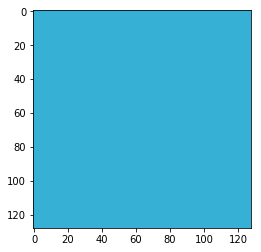

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
color_array = np.ndarray(shape=(128,128,3))
color_array[:,:,:] = rgb
plt.imshow(color_array)

[0.6524935  0.64561981 0.35802674]


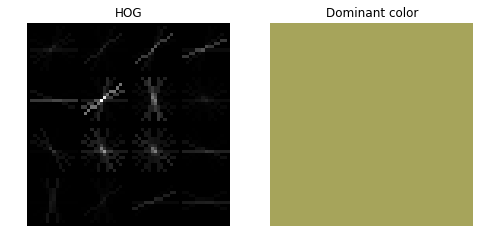

Wall time: 3.43 s


In [17]:
%%time

image = np.asarray(plt.imread(r"C:\Users\Thijs\Google Drive\LEGO Vision\Natuurlijke data\IMG_20181022_105045.jpg"))
helpers.pipeline(image, shape=(64,64), pixels_per_cell=(16,16), cells_per_block=(4,4),
                 smoothing=0.2, denoising=0.2, debug=True, with_hog_attached=True, with_dominant_color_attached=True)

In [1]:
import helpers

dataset_path = r"C:\Users\Thijs\Google Drive\LEGO Vision\Natuurlijke data"

X, y = helpers.images_to_dataset(dataset_path=dataset_path, shape=(32,32), 
                                 smoothing=0.1, denoising=0.1, with_hog_attached=True, with_dominant_color_attached=True,
                                 pixels_per_cell=(8, 8), cells_per_block=(2,2), orientations=9,
                                 samples=20, debug=False)

In [67]:
import numpy as np
from colour import Color
Color(rgb=np.asarray(X)[:99, :3].mean(axis=0))
print(set(y))

{'3039-trans-clear', '3298-yellow', '3003-yellow', '3710-red', '2458-blue', '3020-red', '6041-yellow'}


20


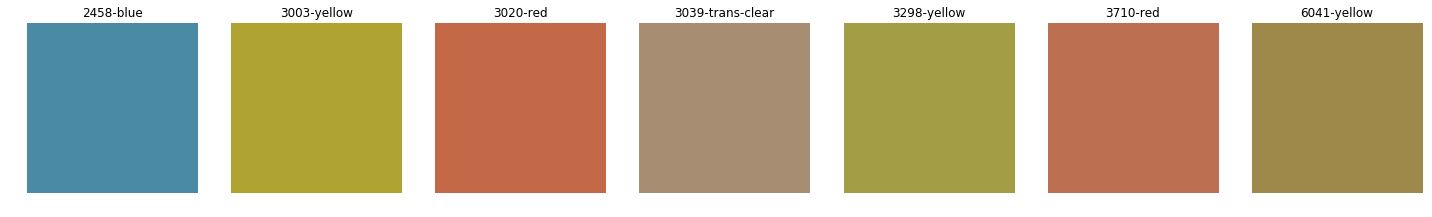

In [6]:
%matplotlib inline

from colour import Color
import numpy as np
import matplotlib.pyplot as plt

classes = set(y)
fig, axs = plt.subplots(nrows=1, ncols=len(classes), figsize=(25, 6), sharex=True, sharey=True)

axs = axs.ravel()
amount_per_class = int(len(y) / len(classes))
print(amount_per_class)
r = np.asarray(X)[:, :3]
l = np.asarray(y)
for i in range(len(classes)): 
    color_values, r = r[:amount_per_class], r[amount_per_class:]
    color_labels, l = l[:amount_per_class], l[amount_per_class:]
    rgb = color_values.mean(axis=0)
#     rgb = sample[:3]
    color_array = np.ndarray(shape=(28,28,3))
    color_array[:,:,:] = rgb
    axs[i].imshow(color_array)
    axs[i].axis('off')
    axs[i].set_title(color_labels[0])
plt.show()

In [16]:
import glob, os
from PIL import Image
dataset_path = r"C:\Users\Thijs\Google Drive\LEGO Vision\Natuurlijke data\2458-blue"

total = np.array()
for file in glob.glob(os.path.join(dataset_path, '*.jpg')):
    rgb = helpers.dominant_color(np.array(Image.open(file)))
    print(rgb)
    

[ 15.08510638 158.8983934  239.09292228]
[ 14.97108434 117.11084337 191.94337349]
[ 13.09903382 127.86714976 211.85748792]
[ 12.10023866 102.68615752 170.46062053]
[ 12.55408654 121.23076923 200.93990385]
[  9.94081272 136.29637809 234.6479682 ]
[ 15.69822485 164.18934911 236.36804734]
[ 17.2681764  161.76042908 235.65435042]
[ 16.30518697 136.2424608  221.11218335]
[ 15.93115942 129.40096618 210.08816425]
[ 13.09025271 129.93261131 218.26474128]
[ 26.77751479 160.68757396 230.79171598]
[ 10.71397188 151.8870826  241.95738137]
[ 16.00130265 163.62353452 239.14415979]
[ 14.73959572 151.68252081 235.46492271]
[ 13.69892473 141.59513791 234.14446003]
[ 15.38862559 162.91350711 236.47393365]
[ 15.74231678 164.45153664 235.83096927]
[ 12.95662651 129.81686747 218.03614458]
[ 13.44434629 135.93727915 223.31404594]
[ 15.0942029  128.62560386 210.        ]
[ 13.09101796 131.63832335 218.68742515]
[ 12.41034898 120.19494585 206.17930205]
[ 10.1907489  127.32907489 211.54537445]
[ 25.26991677 15

KeyboardInterrupt: 

[[0.16862745 0.16862745 0.16862745 ... 0.15686275 0.15686275 0.15686275]
 [0.16862745 0.16862745 0.16862745 ... 0.15686275 0.15686275 0.15686275]
 [0.16862745 0.16862745 0.16862745 ... 0.15686275 0.15686275 0.15686275]
 ...
 [0.29411765 0.29411765 0.29411765 ... 0.29411765 0.29411765 0.29411765]
 [0.29803922 0.29803922 0.29803922 ... 0.29411765 0.29411765 0.29411765]
 [0.29803922 0.29803922 0.29803922 ... 0.29411765 0.29411765 0.29411765]]


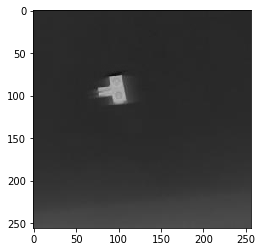

In [12]:
%matplotlib inline

from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import sys

image = Image.open(r"D:\LEGO Vision Datasets\classification-natural-data\2458-blue\Original Photos_original_Original Photos_original_IMG_20181023_173441.jpg_d31b79b8-eaaf-48de-a1f5-98daa98faf42.jpg_1cf145cc-f6f4-4563-8e6b-1bff2066ab40.jpg").convert("L")
image = ImageOps.invert(image)
plt.imshow(image)
print(np.asarray(image) / 255.)